## concatenate

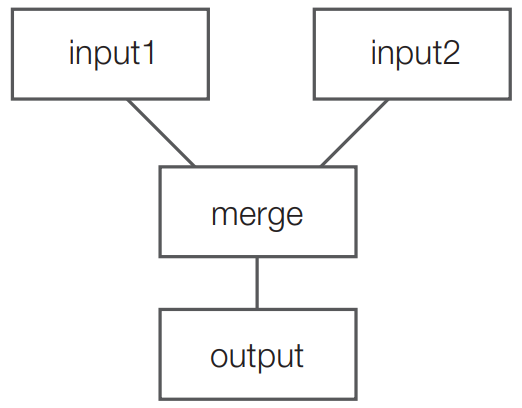

In [ ]:
Image('/content/drive/My Drive/Prediction of Time Series Walking in Deep Learning/pic/ch05_01.png', width=300)

In [ ]:
# 1. 데이터
import numpy as np
x1 = np.array([range(100), range(311,411), range(100)])
x2 = np.array([range(101,201), range(311,411), range(101,201)])
y  = np.array([range(501,601)]) #, range(711,811), range(100)]

x1 = np.transpose(x1)
y  = np.transpose(y)
x2 = np.transpose(x2)

from sklearn.model_selection import train_test_split
x1_train, x1_test, y_train, y_test = train_test_split(x1, y, random_state=66, test_size=0.4, shuffle=False)
x1_val,   x1_test, y_val,   y_test = train_test_split(x1_test, y_test, random_state=66, test_size=0.5, shuffle=False)
x2_train, x2_test                  = train_test_split(x2, random_state=66, test_size=0.4, shuffle=False)
x2_val,   x2_test                  = train_test_split(x2_test, random_state=66, test_size=0.5, shuffle = False)

# 2. 모델 구성
# 2개의 모델을 만든 뒤 다시 병합
from keras.models import Sequential, Model
from keras.layers import Dense, Input

# 히든 레이어의 깊이는 설정값
input1   = Input(shape=(3,))
dense1   = Dense(100, activation='relu')(input1)
dense1_2 = Dense(30)(dense1)
dense1_3 = Dense(7)(dense1_2)

input2   = Input(shape=(3,))
dense2   = Dense(50, activation='relu')(input2)
dense2_2 = Dense(7)(dense2)

# concatenate는 keras.layers와 keras.layers.merge 두 곳 중에 아무 곳에서나 import해주면 된다.
from keras.layers.merge import concatenate
merge1 = concatenate([dense1_3, dense2_2])

# 위와 동일한 기능
# from keras.layers.merge import Concatenate
# merge1 = Concatenate()([dense1_3, dense2_2])

model1 = Dense(10)(merge1)
model2 = Dense(5)(model1)
output = Dense(1)(model2)

model = Model(inputs = [input1, input2], outputs = output)
model.summary()

# 3. 훈련
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
# x의 입력데이터가 2개 -> [x1_train, x2_train]가 리스트 형태
model.fit([x1_train, x2_train], y_train, epochs=100, batch_size=1, validation_data=([x1_val, x2_val] , y_val), verbose=0)

# 4. 평가 예측
mse = model.evaluate([x1_test, x2_test], y_test, batch_size=1)
print("mse : ", mse)

y_predict = model.predict([x1_test, x2_test])
for i in range(len(y_predict)):
    print(y_test[i], y_predict[i])

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 100)          400         input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           3030        dense_4[0][0]                    
_______________________________________________________________________________________

## Merge Layer

- Add
  - keras.layers.Add()
  - layer끼리 단순한 더하기
  - 동일한 모양의 텐서 목록을 입력으로 사용, 하나의 텐서(같은 모양)를 반환

```
import keras
input1 = keras.layers.Input(shape=(16,))
x1     = keras.layers.Dense(8, activation='relu')(input1)
input2 = keras.layers.Input(shape=(32,))
x2     = keras.layers.Dense(8, activation='relu')(input2)
added  = keras.layers.Add()([x1, x2])

out   = keras.layers.Dense(4)(added)
model = keras.models.Model(inputs=[input1, input2], outputs=out)
```

- Subtract
  - keras.layers.Subtract()
  - layer끼리의 단순한 뺄셈
  - 동일한 모양의 크기 2인 텐서 목록을 입력으로 사용, 동일한 모양의 단일 텐서(입력[0] - 입력[1])를 반환

```
import keras
input1     = keras.layers.Input(shape=(16,))
x1         = keras.layers.Dense(8, activation='relu')(input1)
input2     = keras.layers.Input(shape=(32,))
x2         = keras.layers.Dense(8, activation='relu')(input2)
subtracted = keras.layers.Subtract()([x1, x2])

out   = keras.layers.Dense(4)(subtracted)
model = keras.models.Model(inputs=[input1, input2], outputs=out)
```

- Multiply
  - keras.layers.Multiply()
  - layer끼리의 입력 목록을 요소 별로 곱하는 레이어
  - 동일한 모양의 텐서 목록을 입력으로 사용, 하나의 텐서를 반환

- Average
  - keras.layers.Average()
  - 인풋 리스트의 평균을 내는 레이어
  - 동일한 모양의 텐서 목록을 입력으로 사용, 하나의 텐서를 반환


- Maximum
  - keras.layers.Maximum()
  - 입력 목록의 최대(요소 별로)를 계산하는 레이어
  - 동일한 모양의 텐서 목록을 입력으로 사용, 하나의 텐서를 반환

- Minimum
  - keras.layers.Minimum()
  - 입력 목록의 최소(요소 별로)를 계산하는 레이어
  - 동일한 모양의 텐서 목록을 입력으로 사용, 하나의 텐서를 반환

- Concatenate
  - keras.layers.Concatenate(axis=-1)
  - 입력 목록을 연결하는 계층
  - 연결 축을 제외한 동일한 모양의 텐서 목록을 입력으로 사용, 모든 입력의 연결인 단일 텐서를 반환

- Dot
  - keras.layers.Dot(axis, normalize=False)
  - 두 텐서에서 샘플 간 내적을 계산하는 레이어
  - 2개의 텐서 a와 b의 모양(batch_size, n) 목록에 적용되는 경우, 출력은 모양의 텐서(batch_size, 1)
    - 각 항목 i는 a[i]와 b[i] 사이의 내적

- add
  - keras.layers.add(inputs)
  - Add와 같은 결과를 나타내지만, 사용법이 약간 다름
    - Add : added = keras.layers.Add()([x1, x2])
    - add : added = keras.layers.add([x1, x2])

```
import keras
input1 = keras.layers.Input(shape=(16,))
x1     = keras.layers.Dense(8, activation='relu')(input1)
input2 = keras.layers.Input(shape=(32,))
x2     = keras.layers.Dense(8, activation='relu')(input2)
added  = keras.layers.add([x1, x2])

out   = keras.layers.Dense(4)(added)
model = keras.models.Model(inputs=[input1, input2], outputs=out)
```



- subtract
  - keras.layers.subtract(inputs)
  - 레이어 간 노드의 빼기
  - Subtract와 동일한 사용법, () 주의

```
import keras
input1     = keras.layers.Input(shape=(16,))
x1         = keras.layers.Dense(8, activation='relu')(input1)
input2     = keras.layers.Input(shape=(32,))
x2         = keras.layers.Dense(8, activation='relu')(input2)
subtracted = keras.layers.subtract([x1, x2])

out   = keras.layers.Dense(4)(subtracted)
model = keras.models.Model(inputs=[input1, input2], outputs=out)
```

- multiply
  - keras.layers.multiply(inputs)
  - Multiply와 동일한 사용법, () 주의
  - Input tensor가 최소 2개 이상

- average
  - keras.layers.average(inputs)
  - Average와 동일한 사용법, () 주의
  - Input tensor가 최소 2개 이상

- maximun
  - keras.layers.maximun(inputs)
  - Maximun과 동일한 사용법, () 주의
  - Input tensor가 최소 2개 이상

- minimum
  - keras.layers.minimum(inputs)
  - Minimum과 동일한 사용법, () 주의
  - Input tensor가 최소 2개 이상

- concatenate
  - keras.layers.concatenate(inputs, axis=-1)
  - concatenate와 동일한 사용법

- dot
  - keras.layers.dot(inputs, axis, normalize=False)
  - dot과 동일한 사용법, () 주의
  - inputs는 2개 이상의 텐서
  - normalize()는 L2 정규화의 여부